<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Courses/blob/main/3D_Plotting_in_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D Plotting in Matplotlib

In [1]:
!pip install -q ipympl

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib widget

## `projection='3d'`

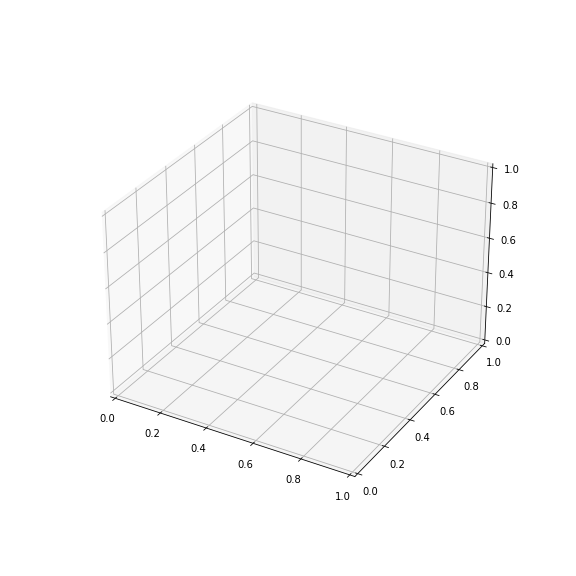

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

## 3D Points and Lines

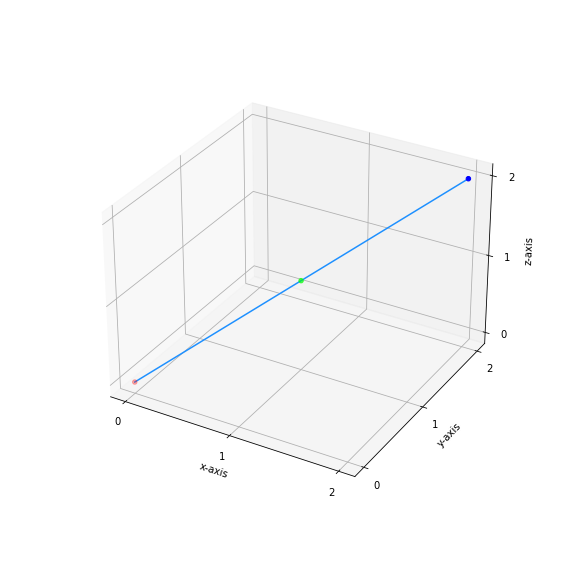

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 1, 2])
ax.set_zticks([0, 1, 2])

ax.plot3D(xs=np.array([0, 1, 2]),
          ys=np.array([0, 1, 2]),
          zs=np.array([0, 1, 2]), 
          c='dodgerblue')

#ax.scatter3D(xs=0, ys=0, zs=0, c='red')
#ax.scatter3D(xs=1, ys=1, zs=1, c='lime')
#ax.scatter3D(xs=2, ys=2, zs=2, c='blue')
ax.scatter3D(xs=np.array([0, 1, 2]),
          ys=np.array([0, 1, 2]),
          zs=np.array([0, 1, 2]), 
          c=['red', 'lime', 'blue'])

plt.show()

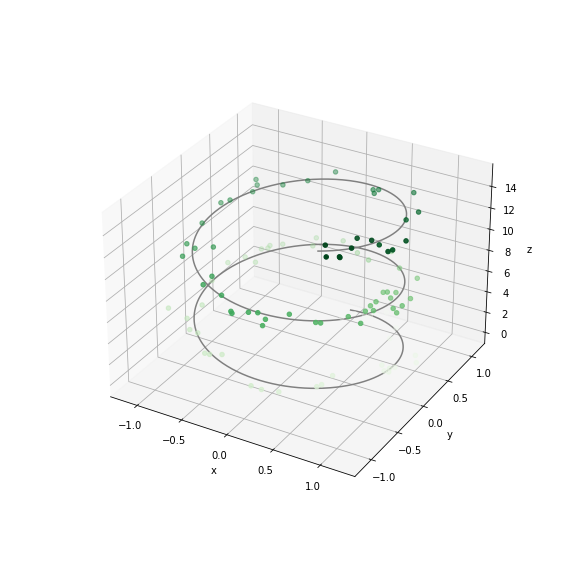

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# data for a 3D line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# data for 3D scatter points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

plt.show()

## 3D Continuous line

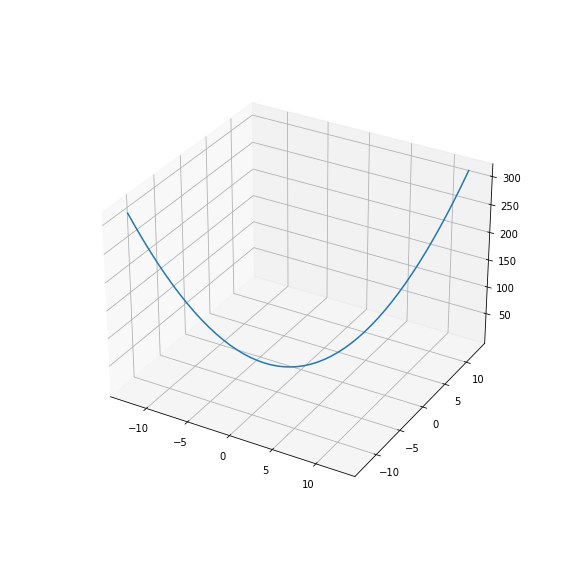

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

x = np.linspace(-4 * np.pi, 4 * np.pi, 50)
y = np.linspace(-4 * np.pi, 4 * np.pi, 50)
z = x**2 + y**2

ax.plot3D(x, y, z)

plt.show()

## 3D Contour Plot

In [8]:
x = np.linspace(-4 * np.pi, 4 * np.pi, 50)
y = np.linspace(-4 * np.pi, 4 * np.pi, 50)
z = lambda x, y: x**2 + y**2

X, Y = np.meshgrid(x, y)
Z = z(X, Y)

In [9]:
x.shape, y.shape, z(x, y).shape

((50,), (50,), (50,))

In [10]:
X.shape, Y.shape, Z.shape

((50, 50), (50, 50), (50, 50))

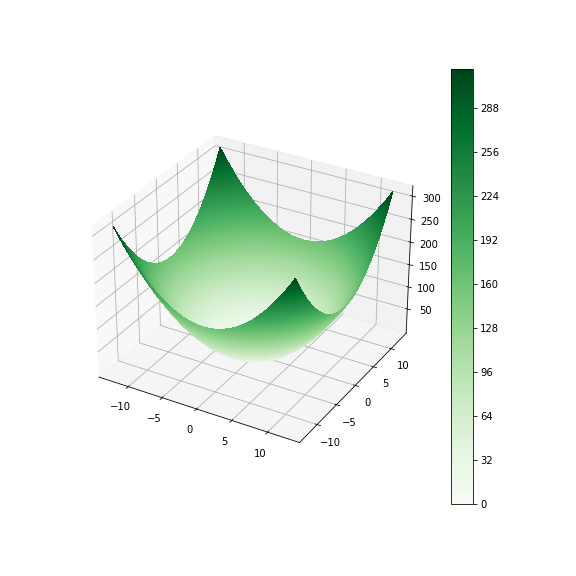

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')
# ax.view_init(60, 35)

contour = ax.contourf3D(X, Y, Z, levels=500, cmap='Greens')
fig.colorbar(contour)
plt.show()

The above plot is analogous to its 2D version

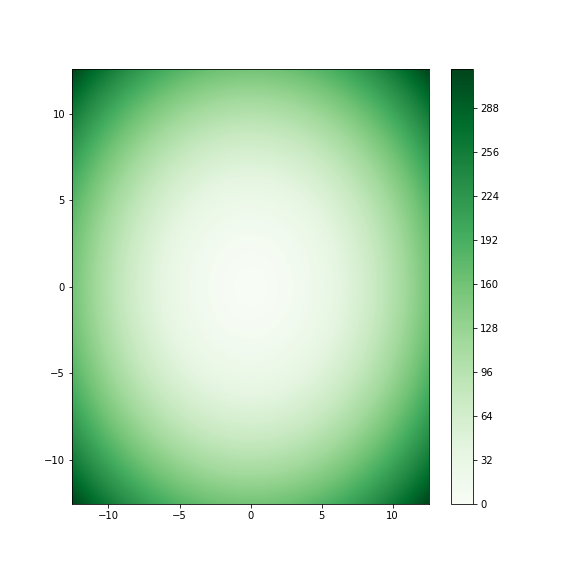

In [12]:
fig = plt.figure(figsize=(8, 8))
                     
plt.contourf(X, Y, Z, levels=500, cmap='Greens')
plt.colorbar()
plt.show()

## Wireframes and Surface Plots

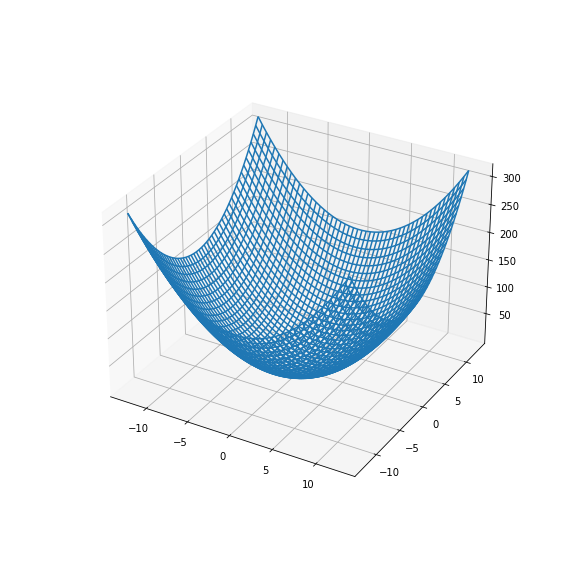

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_wireframe(X, Y, Z)

plt.show()

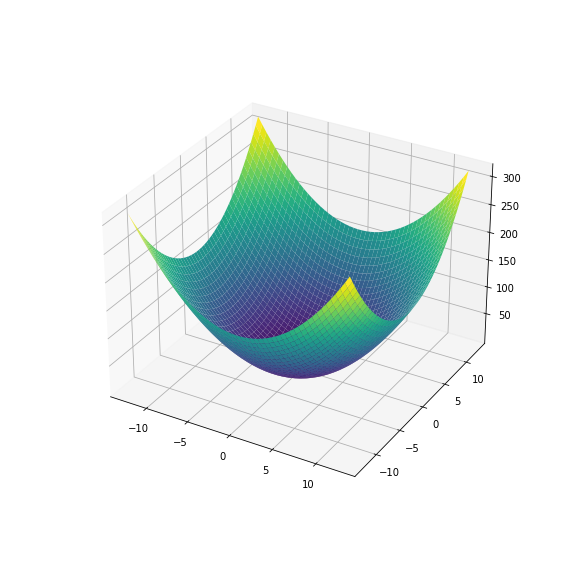

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')

plt.show()

## Soup Bowl

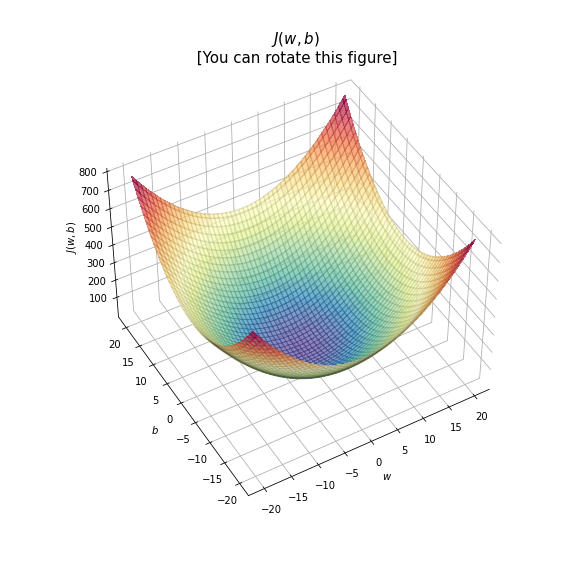

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))   
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_rotate_label(False)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
ax.set_zlabel('$J(w,b)$', rotation=90)
ax.set_title("$J(w,b)$\n [You can rotate this figure]", size=15)

ax.view_init(45, -120)

w = np.linspace(-20, 20, 100)
b = np.linspace(-20, 20, 100)
z = lambda x, y: x**2 + y**2

W, B = np.meshgrid(w, b)
J = z(W, B)

ax.plot_surface(W, B, J, 
                cmap='Spectral_r', 
                alpha=0.7, 
                antialiased=False)
ax.plot_wireframe(W, B, J, color='k', alpha=0.1)

plt.show()

## Event Handling

[For more details](https://matplotlib.org/stable/users/explain/event_handling.html)

## Event connections

To receive events:

1. Write a callback function
2. Connect your function to the event manager, which is part of the `FigureCanvasBase`

`mpl_connect` returns a connection id (an integer), which can be used to disconnect the callback via `fig.canvas.mpl_disconnect(cid)`

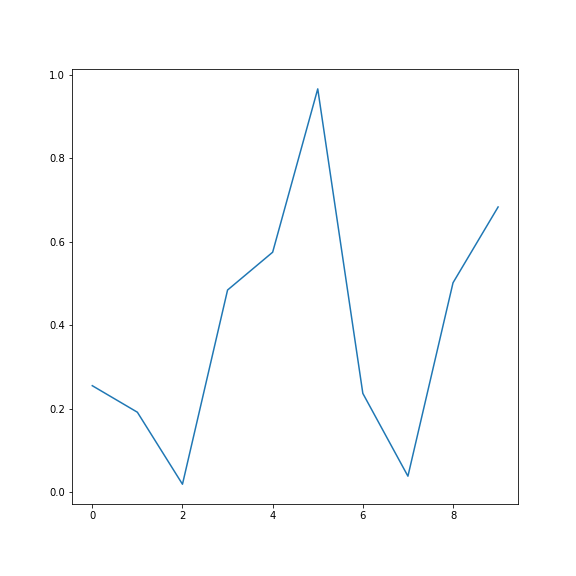

In [16]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single',
           event.button,
           event.x, 
           event.y,
           event.xdata if event.xdata else -1,
           event.ydata if event.ydata else -1))
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

## List of Events

- 'Event name': `Class`: description
---

- 'button_press_event': `MouseEvent`: mouse button is pressed
- 'button_release_event': `MouseEvent`: mouse button is released
- 'close_event': `CloseEvent`: figure is closed
- 'draw_event': `DrawEvent`: canvas has been drawn (but screen widget not updated yet)
- 'key_press_event': `KeyEvent`: key is pressed
- 'key_release_event': `KeyEvent`: key is released
- 'motion_notify_event': `MouseEvent`: mouse moves
- 'pick_event': `PickEvent`: artist in the canvas is selected
- 'resize_event': `ResizeEvent`: figure canvas is resized
- 'scroll_event': `MouseEvent`: mouse scroll wheel is rolled
- 'figure_enter_event': `LocationEvent`: mouse enters a new figure
- 'figure_leave_event': `LocationEvent`: mouse leaves a figure
- 'axes_enter_event': `LocationEvent`: mouse enters a new axes
- 'axes_leave_event': `LocationEvent`: mouse leaves an axes

## Event attributes

- All `matplotlib` events inherit from the base class `matplotlib.backend_bases.Event`
- as such they have these attributrs
    1. `name`: the event name
    2. `canvas`: the `FigureCanvas` instance generating the event
    3. `guiEvent`: the GUI event that triggered the `matplotlib` event

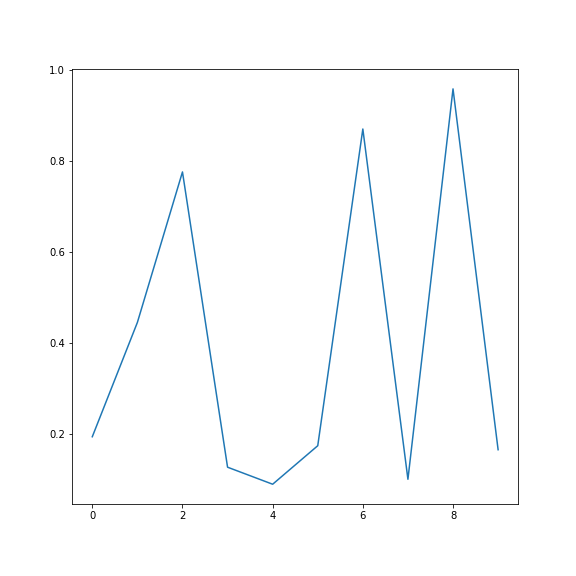

In [17]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))

def onclick(event):
    print(event.name)
    print(type(event.name))
    print('\n--')
    print(event.canvas, type(event.canvas))
    print(type(event.canvas))
    print('\n--')
    print(event.guiEvent)
    print(type(event.guiEvent))
    print('\n--')
    print(event.inaxes)

cid2 = fig.canvas.mpl_connect('button_press_event', onclick)

## Most Common Events

1. `KeyEvent`
    - key_press_event
    - key_release_event
2. `MouseEvent`
    - button_press_event
    - button_release_event
    - motion_notify_event
    - scroll_event

Both of these events are derived from the `LocationEvent` which has the following attributes:

- `x`: mouse x position in pixels from (left, bottom)
- `y`: mouse y position in pixels from (left, bottom)
- `inaxes`: the `Axes` instance over which the mouse is, if any, else `None`
- `xdata`: mouse x position in data coordinates if the mouse is over an axes
- `ydata`: mouse x position in data coordinates if the mouse is over an axes

## Example

- In this canvas, a simple line segment is created every time a mouse is pressed